In [5]:
import numpy as np
import time, os, sys
from glob import glob
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 96
from cellpose import utils, models

import cv2

In [7]:
# HOME = '/home/qzt'
HOME = '/Users/qzt'
# PATH = "data/dsb2018/dsb2018_sub1/"
# PATH = "data/centuri/train/"
PATH = 'cellpose/'
# path = os.path.join(HOME, "data/dsb2018/dsb2018_sub1/images/*.tif")
pathX = os.path.join(HOME, PATH+"images/*.tif")
# pathY = os.path.join(HOME, PATH+"masks/*.tif")
X_file = sorted(glob(pathX))
# Y_file = sorted(glob(pathY))

X = list(map(skimage.io.imread,X_file))
print(len(X))

5


In [8]:
imgs = X[0:2]

In [22]:
# RUN CELLPOSE


# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# model = models.Cellpose(gpu=False, model_type='cyto')
model = models.Cellpose(gpu=False, model_type='nuclei')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]
channels=[0,0]

print(len(imgs),imgs[0].shape)
# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=[0,0], tile=True, net_avg=False)
print(diams)

  0%|          | 0/5 [00:00<?, ?it/s]

>>>> using CPU
5 (1022, 1022)
processing 5 images


  0%|          | 0/5 [00:00<?, ?it/s]

estimated cell diameters for all images


100%|██████████| 5/5 [00:43<00:00,  8.62s/it]

[62.95183487 67.42948321 21.20031979 13.15904928 18.88139488]


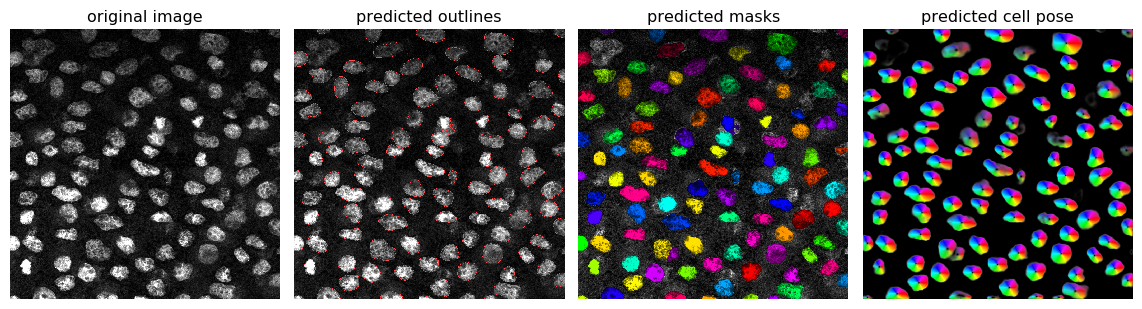

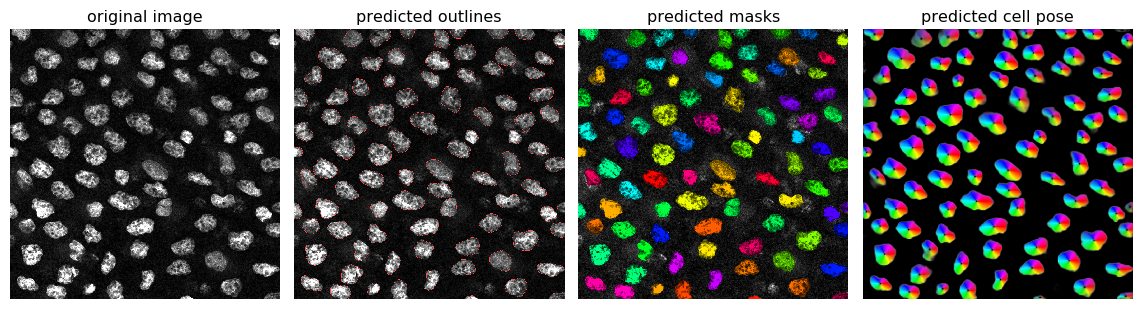

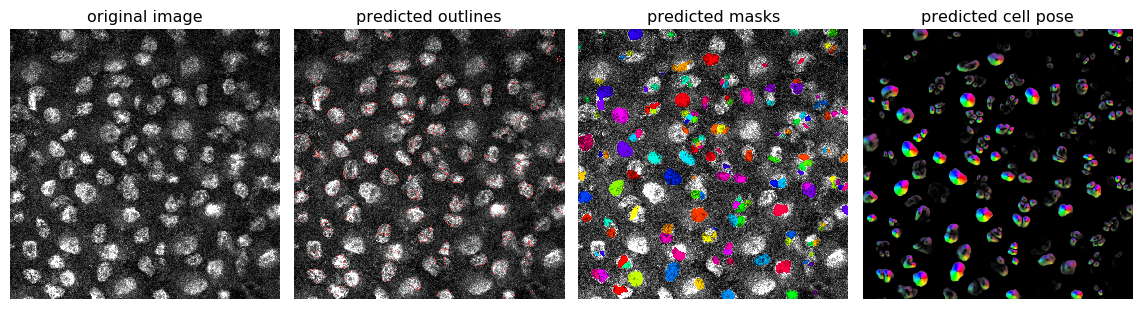

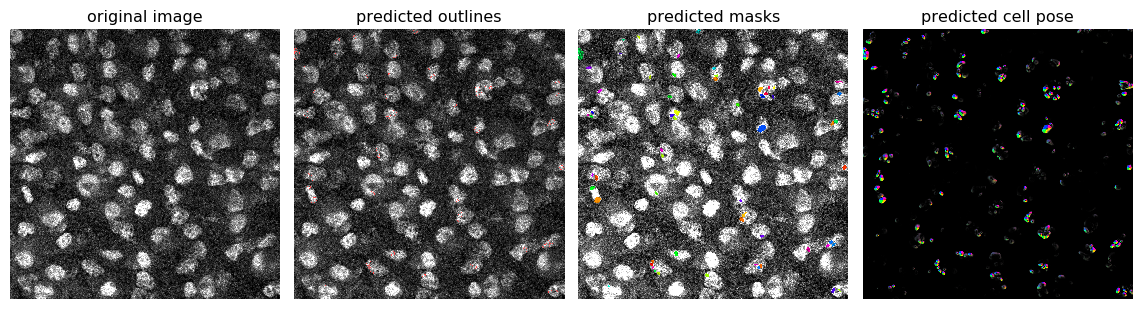

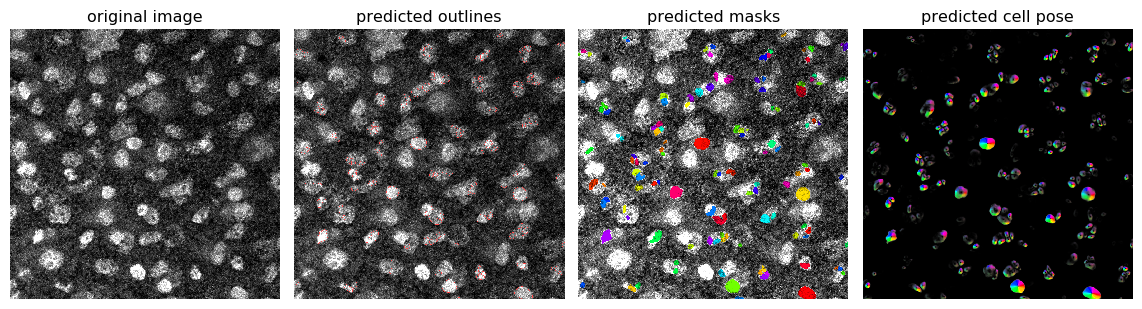

In [24]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

In [9]:
model = models.Cellpose(gpu=False, model_type='nuclei')
channels=[0,0]

masks, flows, styles, diams = model.eval(imgs, diameter=65, channels=[0,0], tile=True, net_avg=True, flow_threshold=0.0)
print(diams)

>>>> using CPU
processing 2 images


100%|██████████| 2/2 [03:46<00:00, 113.49s/it]

[65. 65.]


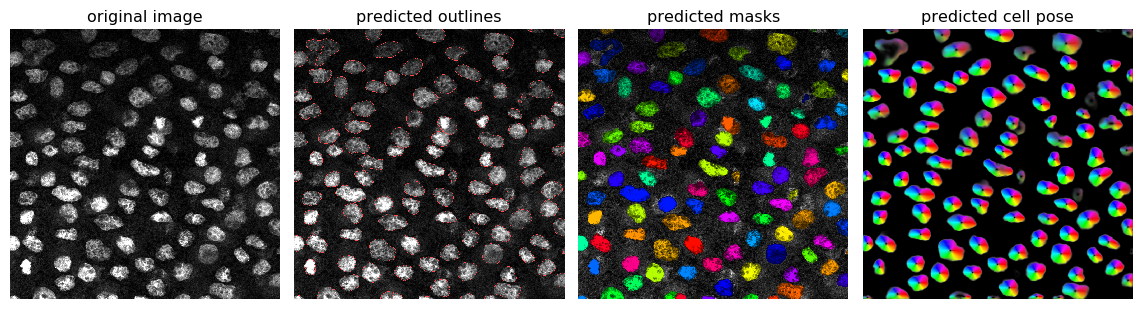

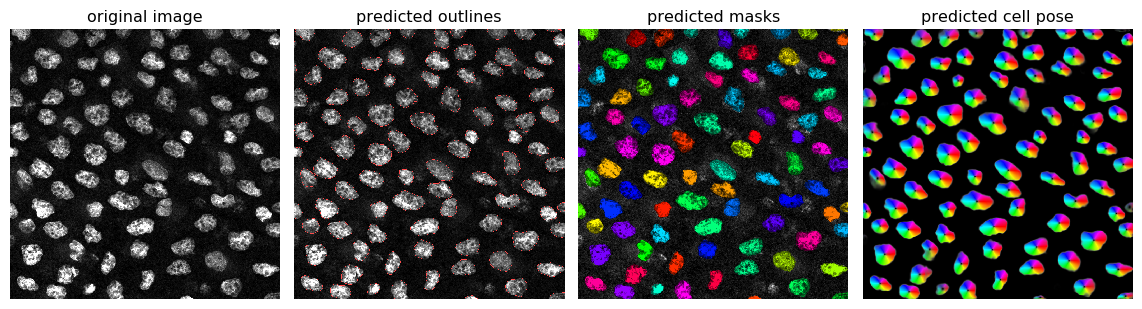

In [10]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

## Test the flow dynamics functions

flows.append([flow, dP, cellprob, p])

In [11]:
flow = flows[0]
dP = flow[1][:2,...]
dP.shape

(2, 1022, 1022)

In [12]:
cv2.imshow("dP[0]", dP[0,...])
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [41]:
flow0[2].shape

(1022, 1022)

In [ ]:
flow=flows[0]
dP = flow[]